In [1]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model, VAR_m
from SIRD  import *
from exponential_regression import ExponentialRegression, MultiDimensionalExponentialRegression
from moving_average import MovingAverage, MovingAverageMulti
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model, evaluate_model_multi
import json
from useful_functions import plot_predictions

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
n_infected=np.array(df['n_infected'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

c:\Users\grego\Documents\code\covid_internship\./models\SIRD.py:218: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(vars)==reach, str(len(vars)) + 'different from ' + str(reach))


In [2]:
import sys
sys.path.append('./models/')
df=pd.read_csv('hopitalized_and_infectious.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
n_hospitalized=np.array(df['hospitalized'])
n_infectious=np.array(df['n_infectious'])



In [3]:
# importing mobility from the csv file
df_mobility=pd.read_csv('mobility.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])


df = pd.read_csv('deaths_and_infections.csv')
relier_les_points=[]
for i in range(len(mobility)): 
    if i + 7 < len(mobility): 
        if i % 7 ==0:
            relier_les_points.append(mobility[i])
        else: 
            decalage=i-7*(i//7)
            res = (1-decalage/7)*mobility[7*(i//7)] + (decalage/7)*mobility[7*(i//7)+7]

            relier_les_points.append(res)
    else:
        relier_les_points.append(mobility[i])
mobility_smoothed=np.array(relier_les_points)
data3D=np.array([new_deaths, n_infected, mobility_smoothed])

In [4]:
models1D=['Arima', 'Exponential Regression', 'Moving Average', 'SIRH1', 'SIRH2', 'SIRH3', 'SIRH4']
models3D=[ 'VAR', 'Exp. Reg. Multi', 'Moving Average multi', 'SIRH multi 1', 'SIRH multi 2']

In [5]:
myarima=ARIMA_Model()
myexp=ExponentialRegression()
myexpmulti=MultiDimensionalExponentialRegression()
mymoving=MovingAverage()
mysird=SIRD_model_2()
mysird.choose_model(True, True)
mysirdmulti1=Multi_SIRD_model()
mysirdmulti1.choose_model(True, True, True)
mysirdmulti2=Multi_SIRD_model()
mysirdmulti2.choose_model(True, True, False)
myvar=VAR_m()
mymovingmulti=MovingAverageMulti()
alphas=np.array([0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
indexs_points=[[30], [40], [50], [60], [70], [80], [90], [100], [110]]
reach=7
weights=np.concatenate((np.array([0.5]), alphas * 0.5))
dicoresults1D=dict()
dicoresults3D=dict()

if False: 
    for index_points in indexs_points:
        ############### 1D
        try: 
            perf_arima=evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perf_arima = np.inf
        try: 
            perf_exp=evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except:
            perf_exp=np.inf
        try: 
            perf_moving=evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights) 
        except: 
            perf_moving = np.inf
        try : 
            perf_sird=evaluate_model(model=mysird, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except :
            perf_sird=np.inf

        ### 




        try : 
            perfmovingmulti=evaluate_model_multi(model=mymovingmulti, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except : 
            perfmovingmulti=np.inf
        try : 
            perf_sirdmulti1=evaluate_model_multi(model=mysirdmulti1, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except : 
            perf_sirdmulti1 = np.inf
        try : 
            perf_sirdmulti2=evaluate_model_multi(model=mysirdmulti2, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perf_sirdmulti2 = np.inf
        try : 
            perfvar=evaluate_model_multi(model=myvar, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except : 
            perfvar=np.inf
        try : 
            perfexpmulti=evaluate_model_multi(model=myexpmulti, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perfexpmulti = np.inf
        
        
        dicoresults1D[str(index_points)]=[perf_arima,perf_exp,  perf_moving, perf_sird]
        dicoresults3D[str(index_points)]=[perfmovingmulti, perf_sirdmulti1, perf_sirdmulti2, perfvar, perfexpmulti]
        
    # write results: 
    with open('./results/comparing_models1D_reach=7.json', 'w') as f:
        json.dump(dicoresults1D, f)
    with open('./results/comparing_models3D_reach=7.json', 'w') as f:
        json.dump(dicoresults3D, f)

In [6]:
# load results for WIS
WIS = True

if WIS: 
    with open('./results/comparing_models1D_WIS_hospitalized_reach=7.json', 'r') as f:
        dicoresults1D_reach_7 = json.load(f)


    with open('./results/comparing_models3D_WIS_hospitalized_reach=7.json', 'r') as f:
        dicoresults3D_reach_7 = json.load(f)


    with open('./results/comparing_models1D_WIS_hospitalized_reach=14.json', 'r') as f:
        dicoresults1D_reach_14 = json.load(f)


    with open('./results/comparing_models3D_WIS_hospitalized_reach=14.json', 'r') as f:
        dicoresults3D_reach_14 = json.load(f)


# load results for rmse : 
RMSE = False
if RMSE:
# load results: 
    with open('./results/comparing_models1D_RMSE_reach=7.json', 'r') as f:
        dicoresults1D_reach_7 = json.load(f)


    with open('./results/comparing_models3D_RMSE_reach=7.json', 'r') as f:
        dicoresults3D_reach_7 = json.load(f)


    with open('./results/comparing_models1D_RMSE_reach=14.json', 'r') as f:
        dicoresults1D_reach_14 = json.load(f)


    with open('./results/comparing_models3D_RMSE_reach=14.json', 'r') as f:
        dicoresults3D_reach_14 = json.load(f)

JSONDecodeError: Expecting value: line 1 column 98 (char 97)

In [ ]:
dicocolors={'Arima': 'red', 'Exponential Regression': 'blue', 'Moving Average': 'green', 'SIRD': 'gold', 'Moving Average multi': 'green', 'SIRD multi 1': 'gold', 'SIRD multi 2': 'orange', 'VAR': 'red', 'Exp. Reg. Multi': 'blue', 'SIRH1': 'gold', 'SIRH2': 'orange', 'SIRH3': 'purple', 'SIRH4': 'pink', 'SIRH multi 1': 'pink', 'SIRH multi 2': 'purple'}

In [ ]:
df=pd.read_csv('hopitalized_and_infectious.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
n_hospitalized=np.array(df['hospitalized'])
n_infectious=np.array(df['n_infectious'])

split=75
# importing mobility from the csv file
df_mobility=pd.read_csv('mobility_bis.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])
data3D=np.array([n_hospitalized, n_infectious, mobility])
datatrain=np.array([n_hospitalized[:split], n_infectious[:split], mobility[:split]])

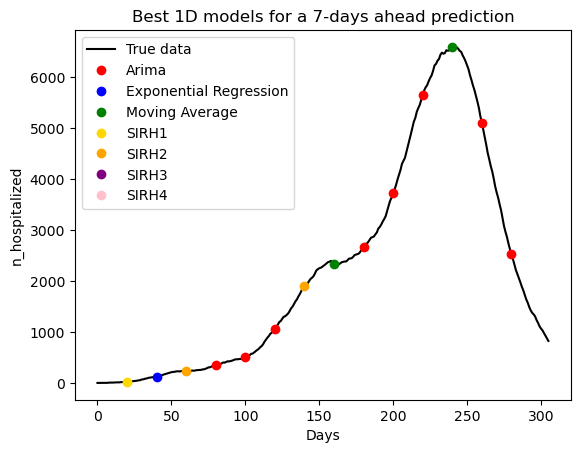

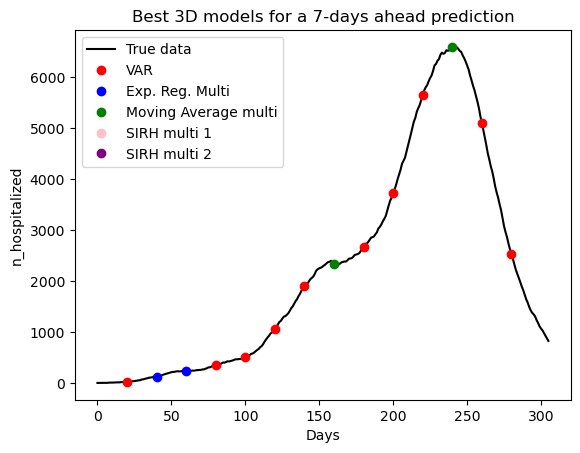

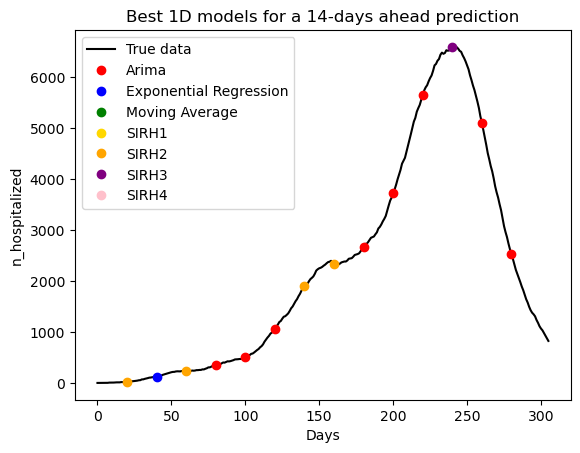

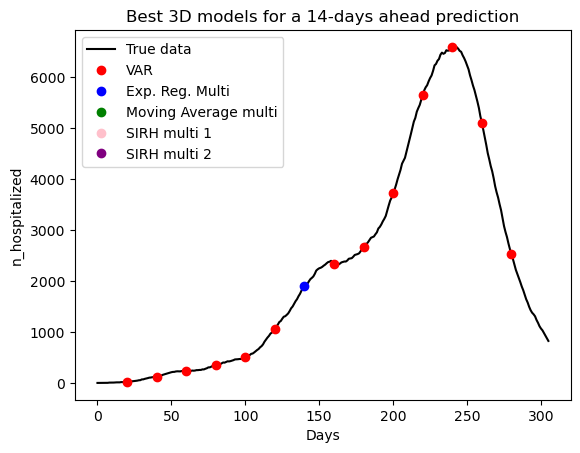

In [ ]:
dico1Dreach7=dict()
for model in models1D: 
    dico1Dreach7[model]=[]

for point in dicoresults1D_reach_7.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico1Dreach7[(models1D[np.argmin(dicoresults1D_reach_7[point])])].append(point_int)
    
plt.plot(n_hospitalized, label='True data', c='black')
for model in dico1Dreach7.keys(): 
    plt.plot(dico1Dreach7[model], n_hospitalized[dico1Dreach7[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 1D models for a 7-days ahead prediction')
plt.xlabel('Days')
plt.ylabel('n_hospitalized')
plt.show()


dico3Dreach7=dict()
for model in models3D: 
    dico3Dreach7[model]=[]
for point in dicoresults3D_reach_7.keys():
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico3Dreach7[(models3D[np.argmin(dicoresults3D_reach_7[point])])].append(point_int)
plt.plot(n_hospitalized, label='True data', c='black')
for model in dico3Dreach7.keys(): 
    plt.plot(dico3Dreach7[model], n_hospitalized[dico3Dreach7[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 3D models for a 7-days ahead prediction')
plt.xlabel('Days')
plt.ylabel('n_hospitalized')
plt.show()


dico1Dreach14=dict()
for model in models1D: 
    dico1Dreach14[model]=[]
for point in dicoresults1D_reach_14.keys():
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico1Dreach14[(models1D[np.argmin(dicoresults1D_reach_14[point])])].append(point_int)
plt.plot(n_hospitalized, label='True data', c='black')
for model in dico1Dreach14.keys(): 
    plt.plot(dico1Dreach14[model], n_hospitalized[dico1Dreach14[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 1D models for a 14-days ahead prediction')
plt.xlabel('Days')
plt.ylabel('n_hospitalized')
plt.show()


dico3Dreach14=dict()
for model in models3D: 
    dico3Dreach14[model]=[]
for point in dicoresults3D_reach_14.keys():
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico3Dreach14[(models3D[np.argmin(dicoresults3D_reach_14[point])])].append(point_int)
plt.plot(n_hospitalized, label='True data', c='black')
for model in dico3Dreach14.keys(): 
    plt.plot(dico3Dreach14[model], n_hospitalized[dico3Dreach14[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 3D models for a 14-days ahead prediction')
plt.xlabel('Days')
plt.ylabel('n_hospitalized')
plt.show()




In [22]:
with open('./results/compte_rendu1D_reach=7.txt', 'a') as f : 
    for point in dicoresults1D_reach_7.keys(): 
        f.write(' For the point '+str(point) + ' the best model is :' +models1D[np.argmin(dicoresults1D_reach_7[point])]+ ' with a performance of '+str(np.min(dicoresults1D_reach_7[point]))+'\n')


with open('./results/compte_rendu3D_reach=7.txt', 'a') as f :
    for point in dicoresults3D_reach_7.keys(): 
        f.write(' For the point '+str(point) + ' the best model is :' +models3D[np.argmin(dicoresults3D_reach_7[point])]+ ' with a performance of '+str(np.min(dicoresults3D_reach_7[point]))+'\n')

with open('./results/compte_rendu1D_reach=14.txt', 'a') as f :
    for point in dicoresults1D_reach_14.keys(): 
        f.write(' For the point '+str(point) + ' the best model is :' +models1D[np.argmin(dicoresults1D_reach_14[point])]+ ' with a performance of '+str(np.min(dicoresults1D_reach_14[point]))+'\n')

with open('./results/compte_rendu3D_reach=14.txt', 'a') as f :
    for point in dicoresults3D_reach_14.keys(): 
        f.write(' For the point '+str(point) + ' the best model is :' +models3D[np.argmin(dicoresults3D_reach_14[point])]+ ' with a performance of '+str(np.min(dicoresults3D_reach_14[point]))+'\n')

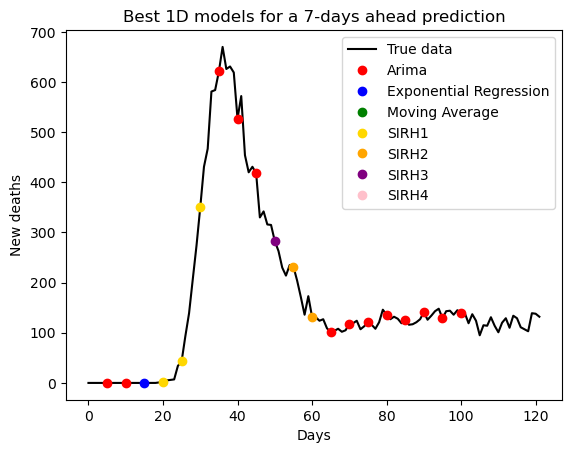

KeyError: 'SIRH multi 1'

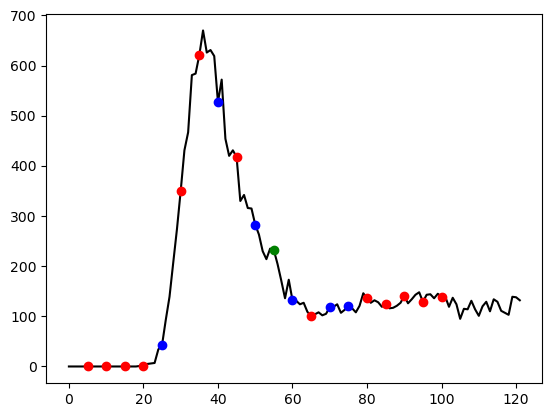

In [21]:
dico1Dreach7=dict()
for model in models1D: 
    dico1Dreach7[model]=[]

for point in dicoresults1D_reach_7.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico1Dreach7[(models1D[np.argmin(dicoresults1D_reach_7[point])])].append(point_int)
    
plt.plot(new_deaths, label='True data', c='black')
for model in dico1Dreach7.keys(): 
    plt.plot(dico1Dreach7[model], new_deaths[dico1Dreach7[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 1D models for a 7-days ahead prediction')
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.show()


dico3Dreach7=dict()
for model in models3D: 
    dico3Dreach7[model]=[]
for point in dicoresults3D_reach_7.keys():
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico3Dreach7[(models3D[np.argmin(dicoresults3D_reach_7[point])])].append(point_int)
plt.plot(new_deaths, label='True data', c='black')
for model in dico3Dreach7.keys(): 
    plt.plot(dico3Dreach7[model], new_deaths[dico3Dreach7[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 3D models for a 7-days ahead prediction')
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.show()


dico1Dreach14=dict()
for model in models1D: 
    dico1Dreach14[model]=[]
for point in dicoresults1D_reach_14.keys():
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico1Dreach14[(models1D[np.argmin(dicoresults1D_reach_14[point])])].append(point_int)
plt.plot(new_deaths, label='True data', c='black')
for model in dico1Dreach14.keys(): 
    plt.plot(dico1Dreach14[model], new_deaths[dico1Dreach14[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 1D models for a 14-days ahead prediction')
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.show()


dico3Dreach14=dict()
for model in models3D: 
    dico3Dreach14[model]=[]
for point in dicoresults3D_reach_14.keys():
    point_int=(int(point.split('[')[1].split(']')[0]))
    dico3Dreach14[(models3D[np.argmin(dicoresults3D_reach_14[point])])].append(point_int)
plt.plot(new_deaths, label='True data', c='black')
for model in dico3Dreach14.keys(): 
    plt.plot(dico3Dreach14[model], new_deaths[dico3Dreach14[model]],'o', c= dicocolors[model], label=model)
plt.legend()
plt.title('Best 3D models for a 14-days ahead prediction')
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.show()





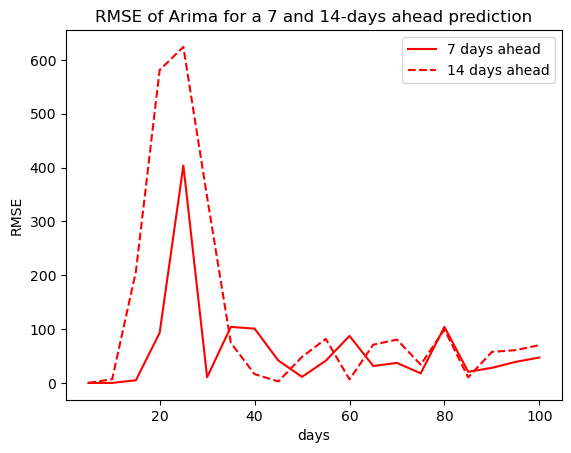

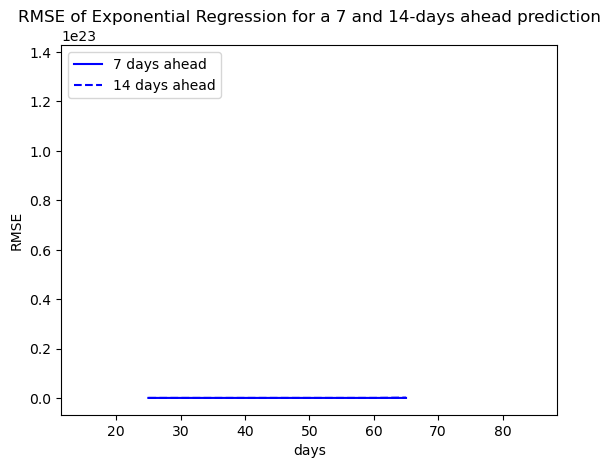

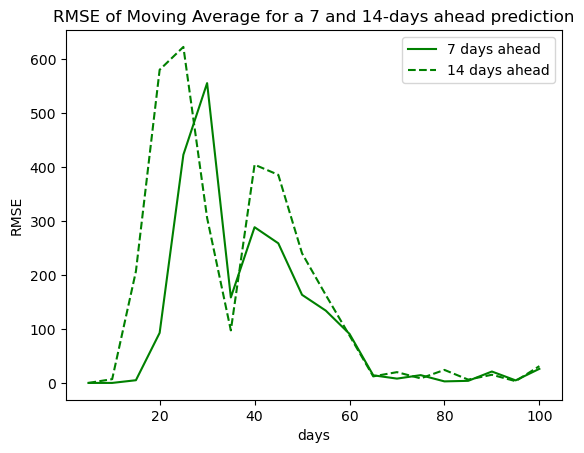

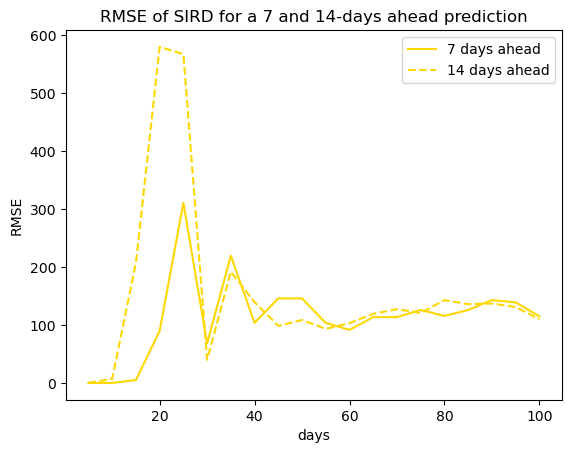

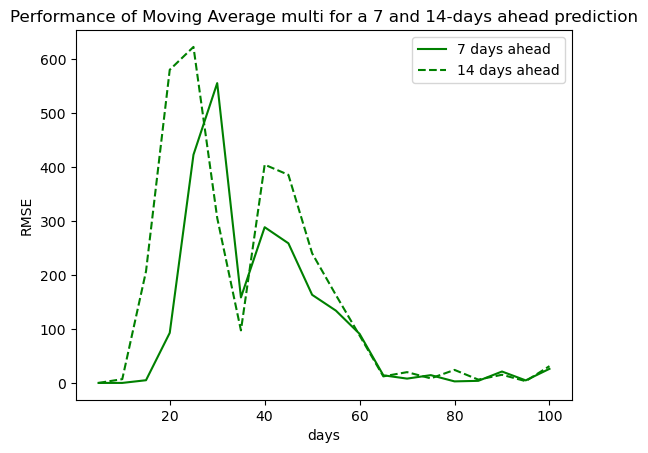

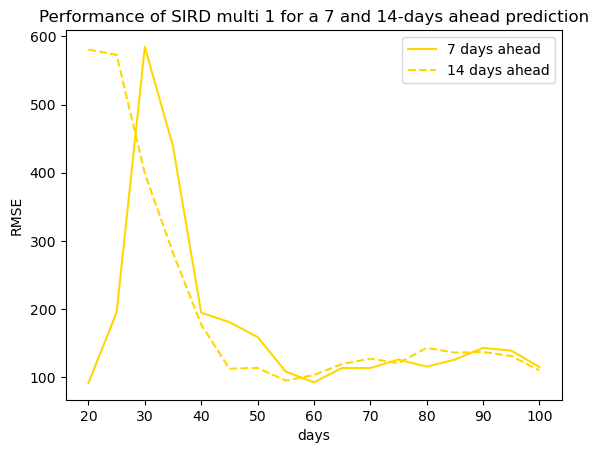

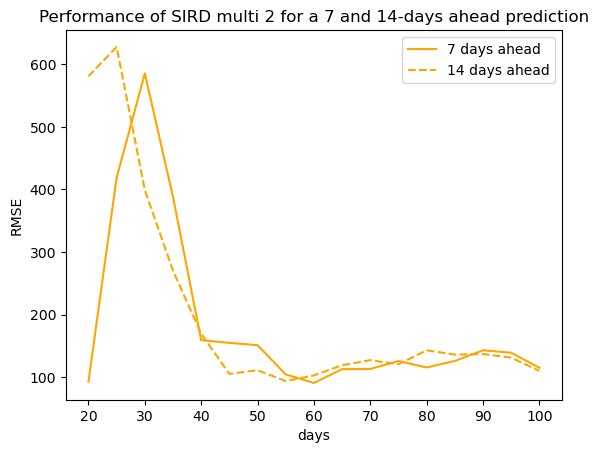

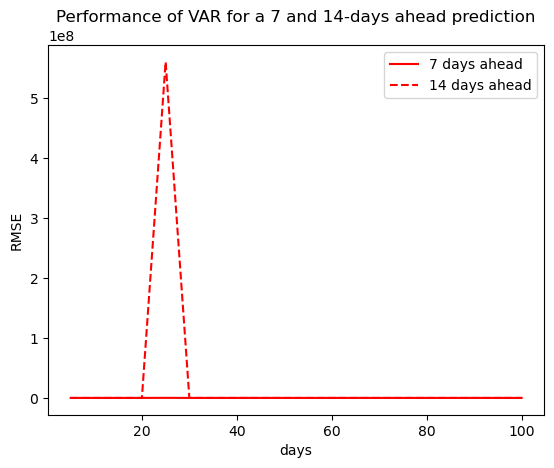

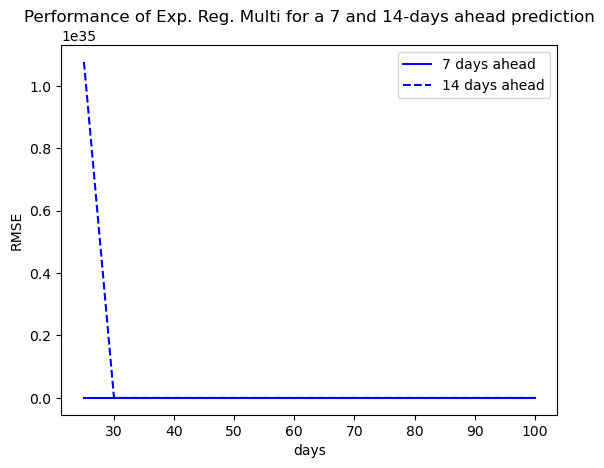

In [24]:
for model in models1D: 
    perfmodelreach7=[]
    perfmodelreach14=[]
    points=[]
    for point in dicoresults1D_reach_7.keys(): 
        point_int=(int(point.split('[')[1].split(']')[0]))
        points.append(point_int)
        perfmodelreach7.append(dicoresults1D_reach_7[point][models1D.index(model)])
        perfmodelreach14.append(dicoresults1D_reach_14[point][models1D.index(model)])
    plt.plot(points, perfmodelreach7, label='7 days ahead', c=dicocolors[model])
    plt.plot(points, perfmodelreach14, label='14 days ahead', c=dicocolors[model], linestyle='--')
    plt.title('RMSE of ' + model + ' for a 7 and 14-days ahead prediction')
    plt.xlabel('days')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()


for model in models3D:
    perfmodelreach7=[]
    perfmodelreach14=[]
    points=[]
    for point in dicoresults3D_reach_7.keys(): 
        point_int=(int(point.split('[')[1].split(']')[0]))
        points.append(point_int)
        perfmodelreach7.append(dicoresults3D_reach_7[point][models3D.index(model)])
        perfmodelreach14.append(dicoresults3D_reach_14[point][models3D.index(model)])
    plt.plot(points, perfmodelreach7, label='7 days ahead', c=dicocolors[model])
    plt.plot(points, perfmodelreach14, label='14 days ahead', c=dicocolors[model], linestyle='--')
    plt.title('Performance of ' + model + ' for a 7 and 14-days ahead prediction')
    plt.xlabel('days')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
        

C:\Users\grego\AppData\Local\Temp\ipykernel_25536\2497516087.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(points, np.log(perf_arima_7), label='Arima', c=dicocolors['Arima'])
C:\Users\grego\AppData\Local\Temp\ipykernel_25536\2497516087.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(points, np.log(perf_var_7), label='VAR',linestyle='--',  c=dicocolors['VAR'])


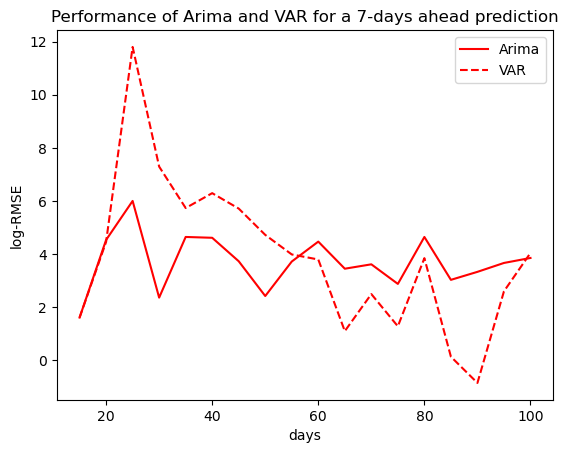

C:\Users\grego\AppData\Local\Temp\ipykernel_25536\2497516087.py:26: RuntimeWarning: divide by zero encountered in log
  plt.plot(points, np.log(perf_arima_14), label='Arima', c=dicocolors['Arima'])
C:\Users\grego\AppData\Local\Temp\ipykernel_25536\2497516087.py:27: RuntimeWarning: divide by zero encountered in log
  plt.plot(points, np.log(perf_var_14), label='VAR',linestyle='--',  c=dicocolors['VAR'])


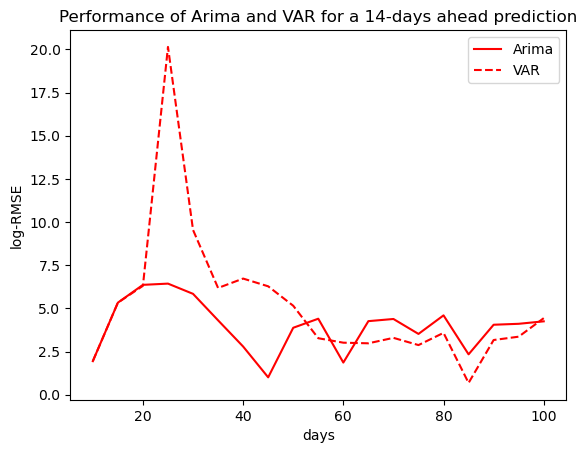

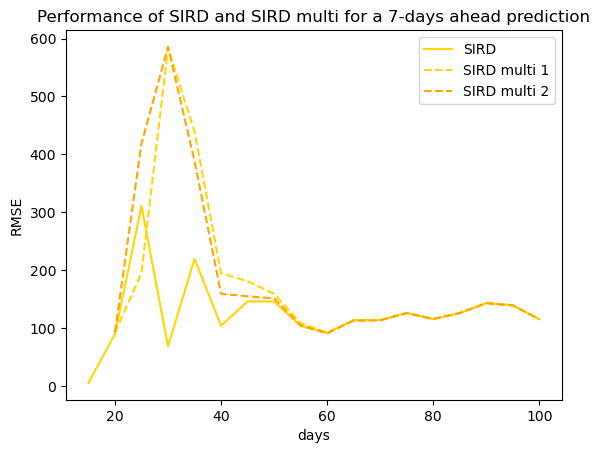

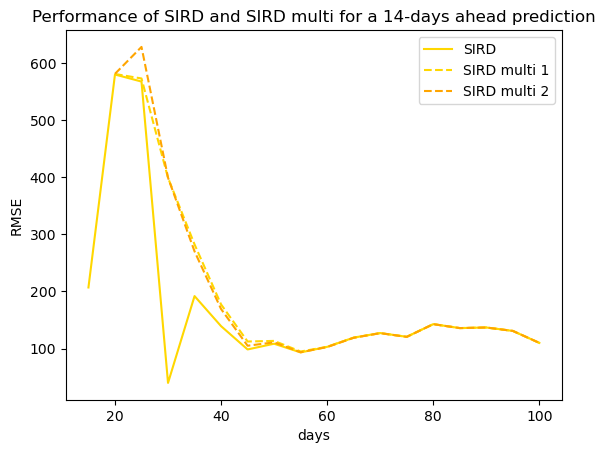

In [25]:
perf_arima_7=[]
perf_var_7=[]
points=[]
for point in dicoresults3D_reach_7.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    points.append(point_int)
    perf_arima_7.append(dicoresults1D_reach_7[point][models1D.index('Arima')])
    perf_var_7.append(dicoresults3D_reach_7[point][models3D.index('VAR')])
plt.plot(points, np.log(perf_arima_7), label='Arima', c=dicocolors['Arima'])
plt.plot(points, np.log(perf_var_7), label='VAR',linestyle='--',  c=dicocolors['VAR'])
plt.title('Performance of Arima and VAR for a 7-days ahead prediction')
plt.xlabel('days')
plt.ylabel('log-RMSE')
plt.legend()
plt.show()


perf_arima_14=[]
perf_var_14=[]
points=[]
for point in dicoresults3D_reach_14.keys():
    point_int=(int(point.split('[')[1].split(']')[0])) 
    points.append(point_int)
    perf_arima_14.append(dicoresults1D_reach_14[point][models1D.index('Arima')])
    perf_var_14.append(dicoresults3D_reach_14[point][models3D.index('VAR')])
plt.plot(points, np.log(perf_arima_14), label='Arima', c=dicocolors['Arima'])
plt.plot(points, np.log(perf_var_14), label='VAR',linestyle='--',  c=dicocolors['VAR'])
plt.title('Performance of Arima and VAR for a 14-days ahead prediction')
plt.xlabel('days')
plt.ylabel('log-RMSE')
plt.legend()
plt.show()

perf_sir_7=[]
perf_sird1_7=[]
perf_sird2_7=[]
points=[]
for point in dicoresults3D_reach_7.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    points.append(point_int)
    perf_sir_7.append(dicoresults1D_reach_7[point][models1D.index('SIRD')])
    perf_sird1_7.append(dicoresults3D_reach_7[point][models3D.index('SIRD multi 1')])
    perf_sird2_7.append(dicoresults3D_reach_7[point][models3D.index('SIRD multi 2')])
plt.plot(points[2:], (perf_sir_7)[2:], label='SIRD', c=dicocolors['SIRD'])
plt.plot(points[2:], (perf_sird1_7)[2:], label='SIRD multi 1',linestyle='--', c=dicocolors['SIRD multi 1'])
plt.plot(points[2:], (perf_sird2_7)[2:], label='SIRD multi 2',linestyle='--', c=dicocolors['SIRD multi 2'])
plt.title('Performance of SIRD and SIRD multi for a 7-days ahead prediction')
plt.xlabel('days')
plt.ylabel('RMSE')
plt.legend()
plt.show()

perf_sir_14=[]
perf_sird1_14=[]
perf_sird2_14=[]
points=[]
for point in dicoresults3D_reach_14.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    points.append(point_int)
    perf_sir_14.append(dicoresults1D_reach_14[point][models1D.index('SIRD')])
    perf_sird1_14.append(dicoresults3D_reach_14[point][models3D.index('SIRD multi 1')])
    perf_sird2_14.append(dicoresults3D_reach_14[point][models3D.index('SIRD multi 2')])
plt.plot(points[2:],(perf_sir_14)[2:], label='SIRD', c=dicocolors['SIRD'])
plt.plot(points[2:], (perf_sird1_14)[2:], label='SIRD multi 1',linestyle='--', c=dicocolors['SIRD multi 1'])
plt.plot(points[2:], (perf_sird2_14)[2:], label='SIRD multi 2',linestyle='--', c=dicocolors['SIRD multi 2'])
plt.title('Performance of SIRD and SIRD multi for a 14-days ahead prediction')
plt.xlabel('days')
plt.ylabel('RMSE')
plt.legend()
plt.show()


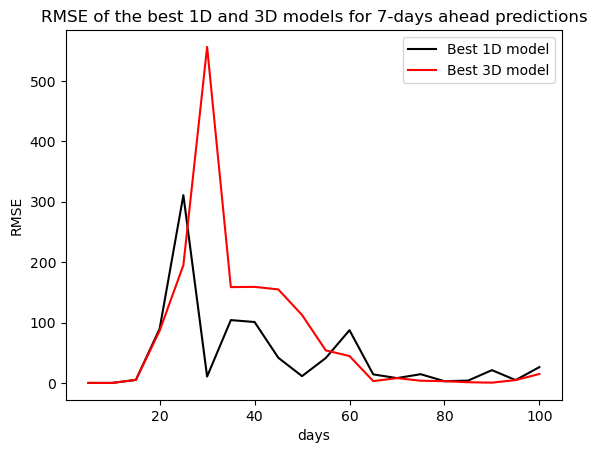

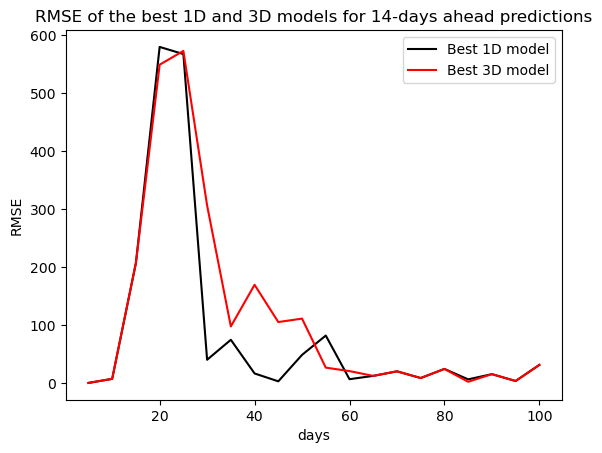

In [26]:
points=[]
best_perf_1D_7=[]
best_perf_3D_7=[]
for point in dicoresults1D_reach_7.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    points.append(point_int)
    index_best_model=np.argmin(dicoresults1D_reach_7[point])
    best_model=models1D[index_best_model]
    best_perf_1D_7.append(dicoresults1D_reach_7[point][index_best_model])
plt.plot(points, best_perf_1D_7, label='Best 1D model', c='black')
for point in dicoresults3D_reach_7.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    index_best_model=np.argmin(dicoresults3D_reach_7[point])
    best_model=models3D[index_best_model]
    best_perf_3D_7.append(dicoresults3D_reach_7[point][index_best_model])
plt.plot(points, best_perf_3D_7, label='Best 3D model', c='red')
plt.title('RMSE of the best 1D and 3D models for 7-days ahead predictions')
plt.xlabel('days')
plt.ylabel('RMSE')
plt.legend()
plt.show()


points=[]
best_perf_1D_14=[]
best_perf_3D_14=[]
for point in dicoresults1D_reach_14.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    points.append(point_int)
    index_best_model=np.argmin(dicoresults1D_reach_14[point])
    best_model=models1D[index_best_model]
    best_perf_1D_14.append(dicoresults1D_reach_14[point][index_best_model])
plt.plot(points, best_perf_1D_14, label='Best 1D model', c='black')
for point in dicoresults3D_reach_14.keys(): 
    point_int=(int(point.split('[')[1].split(']')[0]))
    index_best_model=np.argmin(dicoresults3D_reach_14[point])
    best_model=models3D[index_best_model]
    best_perf_3D_14.append(dicoresults3D_reach_14[point][index_best_model])
plt.plot(points, best_perf_3D_14, label='Best 3D model', c='red')
plt.title('RMSE of the best 1D and 3D models for 14-days ahead predictions')
plt.xlabel('days')
plt.ylabel('RMSE')
plt.legend()
plt.show()



In [19]:
# load results: 
with open('./results/comparing_models1D_RMSE_reach=7.json', 'r') as f:
    dicoresults1D_reach_7 = json.load(f)


with open('./results/comparing_models3D_RMSE_reach=7.json', 'r') as f:
    dicoresults3D_reach_7 = json.load(f)


with open('./results/comparing_models1D_RMSE_reach=14.json', 'r') as f:
    dicoresults1D_reach_14 = json.load(f)


with open('./results/comparing_models3D_RMSE_reach=14.json', 'r') as f:
    dicoresults3D_reach_14 = json.load(f)


Text(0.5, 1.0, 'Points of evaluation and best 3D models for a 7-days ahead prediction')

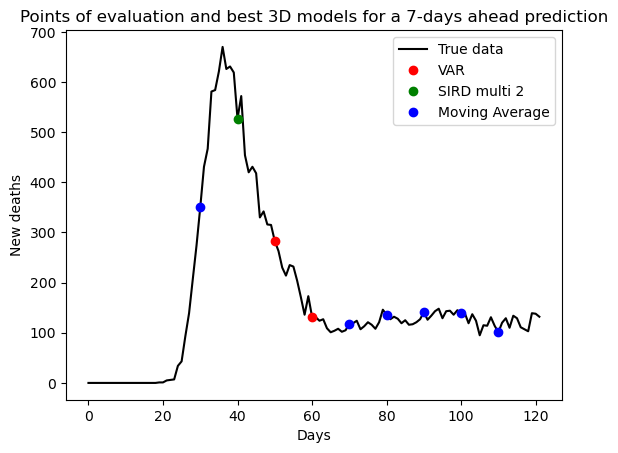

In [ ]:
plt.plot(new_deaths, label='True data', c='black')
plt.plot([ 50, 60], new_deaths[[ 50, 60]], 'ro', label='VAR')
plt.plot([40], new_deaths[[40]], 'go', label= 'SIRD multi 2')
plt.plot( [70, 80, 30,90, 100,  110], new_deaths[ [70, 80, 30, 90,  100, 110]], 'bo', label= 'Moving Average')
# plt.plot([100], new_deaths[100], 'yo', label='Exp. Reg. Multi')
plt.legend()
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.title('Points of evaluation and best 3D models for a 7-days ahead prediction')

Text(0.5, 1.0, 'Points of evaluation and best 3D models for a 14-days ahead prediction')

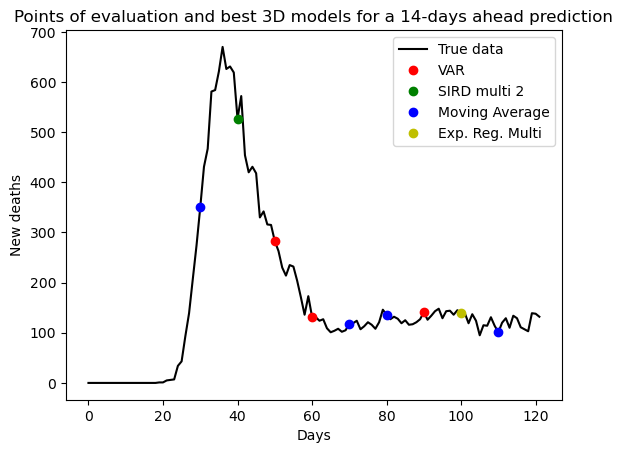

In [ ]:
plt.plot(new_deaths, label='True data', c='black')
plt.plot([ 50, 60, 90], new_deaths[[ 50, 60, 90]], 'ro', label='VAR')
plt.plot([40], new_deaths[[40]], 'go', label= 'SIRD multi 2')
plt.plot( [70, 80, 30,   110], new_deaths[ [70, 80, 30,    110]], 'bo', label= 'Moving Average')
plt.plot([100], new_deaths[100], 'yo', label='Exp. Reg. Multi')
plt.legend()
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.title('Points of evaluation and best 3D models for a 14-days ahead prediction')

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.optimize
def convert_percentage_array_to_floats(array):
    converted_array = []
    for item in array:
        item = item.replace('%', '')  # Remove the '%' symbol
        item = float(item) / 100.0  # Convert the string to float and divide by 100
        converted_array.append(item)
    return converted_array



In [29]:

def solve (f, interval, obj): 
    curve = lambda x : (f(x)-obj)**2
    res = minimize(curve,obj,  bounds=scipy.optimize.Bounds(interval[0], interval[1]))
    # print(curve(res.x))
    return res.x



def compute_confidence_interval(prop_obs, n_pop): 
    f1 = lambda p, n : p - np.sqrt(p*(1-p)/n)*1.96
    f2 = lambda p, n : p + np.sqrt(p*(1-p)/n)*1.96
    p_sup=solve( lambda  x :  f1(x, n_pop), [0, 1], prop_obs )
    p_inf=solve( lambda  x :  f2(x, n_pop), [0, 1], prop_obs )
    return p_inf, p_sup


In [30]:
df

,Unnamed: 0,new_deaths,n_infected
0,0,0.0,0.0
1,1,0.0,0.0
2,2,0.0,1.0
3,3,0.0,5.0
4,4,0.0,9.0
...,...,...,...
117,117,107.0,396597.0
118,118,103.0,372454.0
119,119,139.0,348401.0
120,120,138.0,324464.0


In [31]:
import pandas as pd
df=pd.read_csv('test.csv')
print(df.columns)
# keep only the columns that are interesting: 
df.drop(columns=[ 'LO', 'NPA', 'PCF', 
        'ND', 'PRG', 'EAC', 'EP','AR / RES', 'TEM - AC',
       'LP', 'DLF',  'UPR', 'PA', 'Autres'], inplace=True)
np.array(df['Échantillon'])

new_df=pd.DataFrame()
new_df['Echantillon']=df['Échantillon']

for name in df.columns: 
    if name not in ['Institut', 'Date', 'Échantillon']: 
        new_df[name]=convert_percentage_array_to_floats(np.array(df[name]))
        print(convert_percentage_array_to_floats(np.array(df[name])))

new_df

Index(['Institut', 'Date', 'Échantillon', 'LO', 'NPA', 'PCF', 'LFI', 'PS PP',
       'EELV', 'ND', 'PRG', 'EAC', 'EP', 'ENS', 'AR / RES', 'TEM - AC', 'LR',
       'LP', 'DLF', 'RN', 'REC', 'UPR', 'PA', 'Autres'],
      dtype='object')
[0.08, 0.085, 0.07, 0.08, 0.085, 0.085, 0.075, 0.08, 0.07, 0.07, 0.07, 0.065, 0.09, 0.06, 0.08, 0.075, 0.08, 0.07, 0.08, 0.07]
[0.135, 0.13, 0.14, 0.13, 0.14, 0.12, 0.135, 0.13, 0.14, 0.145, 0.12, 0.13, 0.13, 0.14, 0.125, 0.13, 0.13, 0.14, 0.13, 0.12]
[0.06, 0.06, 0.07, 0.065, 0.055, 0.08, 0.07, 0.06, 0.07, 0.075, 0.07, 0.08, 0.06, 0.06, 0.065, 0.08, 0.07, 0.065, 0.06, 0.075]
[0.17, 0.155, 0.16, 0.16, 0.15, 0.165, 0.165, 0.155, 0.17, 0.16, 0.155, 0.17, 0.16, 0.18, 0.16, 0.175, 0.18, 0.17, 0.16, 0.17]
[0.075, 0.065, 0.07, 0.08, 0.07, 0.065, 0.075, 0.06, 0.07, 0.08, 0.08, 0.06, 0.07, 0.07, 0.06, 0.08, 0.06, 0.065, 0.07, 0.08]
[0.32, 0.295, 0.31, 0.32, 0.31, 0.32, 0.31, 0.295, 0.29, 0.315, 0.32, 0.31, 0.31, 0.29, 0.295, 0.31, 0.3, 0.32, 0.31, 0.315]
[0.065, 

,Echantillon,LFI,PS PP,EELV,ENS,LR,RN,REC
0,1344,0.080,0.135,0.060,0.170,0.075,0.320,0.065
1,1840,0.085,0.130,0.060,0.155,0.065,0.295,0.060
2,1026,0.070,0.140,0.070,0.160,0.070,0.310,0.070
3,1323,0.080,0.130,0.065,0.160,0.080,0.320,0.060
4,2043,0.085,0.140,0.055,0.150,0.070,0.310,0.055
5,1460,0.085,0.120,0.080,0.165,0.065,0.320,0.050
6,1375,0.075,0.135,0.070,0.165,0.075,0.310,0.065
7,2111,0.080,0.130,0.060,0.155,0.060,0.295,0.055
8,1009,0.070,0.140,0.070,0.170,0.070,0.290,0.080
9,1335,0.070,0.145,0.075,0.160,0.080,0.315,0.060


In [32]:
# inverse an array: 
array=np.array([1, 2, 3, 4])
array[::-1]

array([4, 3, 2, 1])

In [40]:
lfi_inf=[]
lfi_sup=[]
PS_inf=[]
PS_sup=[]
eelv_inf=[]
eelv_sup=[]
ens_inf=[]
ens_sup=[]
lr_inf=[]
lr_sup=[]
rn_inf=[]
rn_sup=[]
rec_inf=[]
rec_sup=[]

lfi=np.array(new_df['LFI'])[::-1]
PS=np.array(new_df['PS PP'])[::-1]
eelv=np.array(new_df['EELV'])[::-1]
ens=np.array(new_df['ENS'])[::-1]
lr=np.array(new_df['LR'])[::-1]
rn=np.array(new_df['RN'])[::-1]

rec=np.array(new_df['REC'])[::-1]




for i in range(len(new_df['Echantillon'])): 
    lfi_inf.append(compute_confidence_interval(lfi[i], new_df['Echantillon'][i])[0])
    lfi_sup.append(compute_confidence_interval(lfi[i], new_df['Echantillon'][i])[1])
    PS_inf.append(compute_confidence_interval(PS[i], new_df['Echantillon'][i])[0])
    PS_sup.append(compute_confidence_interval(PS[i], new_df['Echantillon'][i])[1])
    eelv_inf.append(compute_confidence_interval(eelv[i], new_df['Echantillon'][i])[0])
    eelv_sup.append(compute_confidence_interval(eelv[i], new_df['Echantillon'][i])[1])
    ens_inf.append(compute_confidence_interval(ens[i], new_df['Echantillon'][i])[0])
    ens_sup.append(compute_confidence_interval(ens[i], new_df['Echantillon'][i])[1])
    lr_inf.append(compute_confidence_interval(lr[i], new_df['Echantillon'][i])[0])
    lr_sup.append(compute_confidence_interval(lr[i], new_df['Echantillon'][i])[1])
    rn_inf.append(compute_confidence_interval(rn[i], new_df['Echantillon'][i])[0])
    rn_sup.append(compute_confidence_interval(rn[i], new_df['Echantillon'][i])[1])
    rec_inf.append(compute_confidence_interval(rec[i], new_df['Echantillon'][i])[0])
    rec_sup.append(compute_confidence_interval(rec[i], new_df['Echantillon'][i])[1])

lfi_inf=np.array(lfi_inf).reshape(20)
lfi_sup=np.array(lfi_sup).reshape(20)
PS_inf=np.array(PS_inf).reshape(20)
PS_sup=np.array(PS_sup).reshape(20)
eelv_inf=np.array(eelv_inf).reshape(20)
eelv_sup=np.array(eelv_sup).reshape(20)
ens_inf=np.array(ens_inf).reshape(20)
ens_sup=np.array(ens_sup).reshape(20)
lr_inf=np.array(lr_inf).reshape(20)
lr_sup=np.array(lr_sup).reshape(20)
rn_inf=np.array(rn_inf).reshape(20)
rn_sup=np.array(rn_sup).reshape(20)
rec_inf=np.array(rec_inf).reshape(20)
rec_sup=np.array(rec_sup).reshape(20)


# new adds after the 14 / 05 : 
add_lfi=np.array([0.08, 0.075, 0.08])
add_PS=np.array([0.14, 0.14, 0.145])
add_eelv=np.array([0.055, 0.06, 0.065])
add_ens=np.array([0.015, 0.17, 0.16])
add_lr=np.array([0.07, 0.08, 0.07])
add_rn=np.array([0.315, 0.325, 0.31])
add_rec=np.array([0.05, 0.06, 0.06])
add_pop=np.array([2294, 1348, 1530])
for i in range(len(add_lfi)): 
    lfi_inf= np.concatenate((lfi_inf, (compute_confidence_interval(add_lfi[i], add_pop[i])[0])))
    lfi_sup= np.concatenate((lfi_sup, (compute_confidence_interval(add_lfi[i], add_pop[i])[1])))
    PS_inf= np.concatenate((PS_inf, (compute_confidence_interval(add_PS[i], add_pop[i])[0])))
    PS_sup= np.concatenate((PS_sup, (compute_confidence_interval(add_PS[i], add_pop[i])[1])))
    eelv_inf= np.concatenate((eelv_inf, (compute_confidence_interval(add_eelv[i], add_pop[i])[0])))
    eelv_sup= np.concatenate((eelv_sup, (compute_confidence_interval(add_eelv[i], add_pop[i])[1])))
    ens_inf= np.concatenate((ens_inf, (compute_confidence_interval(add_ens[i], add_pop[i])[0])))
    ens_sup= np.concatenate((ens_sup, (compute_confidence_interval(add_ens[i], add_pop[i])[1])))
    lr_inf= np.concatenate((lr_inf, (compute_confidence_interval(add_lr[i], add_pop[i])[0])))
    lr_sup= np.concatenate((lr_sup, (compute_confidence_interval(add_lr[i], add_pop[i])[1])))
    rn_inf= np.concatenate((rn_inf, (compute_confidence_interval(add_rn[i], add_pop[i])[0])))
    rn_sup= np.concatenate((rn_sup, (compute_confidence_interval(add_rn[i], add_pop[i])[1])))
    rec_inf= np.concatenate((rec_inf, (compute_confidence_interval(add_rec[i], add_pop[i])[0])))
    rec_sup= np.concatenate((rec_sup, (compute_confidence_interval(add_rec[i], add_pop[i])[1])))
    

# concatenate the new data:
lfi=np.concatenate((lfi,add_lfi))
PS=np.concatenate((PS,add_PS))
eelv=np.concatenate((eelv,add_eelv))
ens=np.concatenate((ens,add_ens))
lr=np.concatenate((lr,add_lr))
rn=np.concatenate((rn,add_rn))
rec=np.concatenate((rec,add_rec))



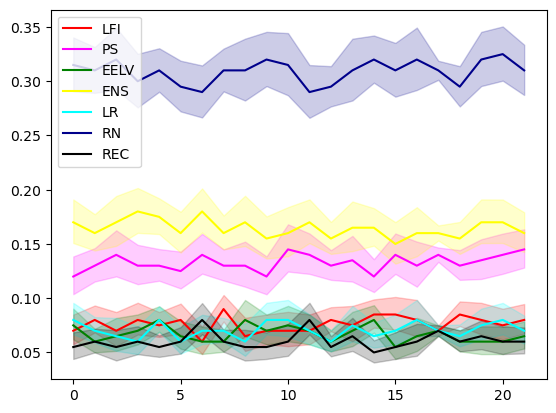

In [41]:

plt.plot(lfi, label='LFI', c='red')
plt.fill_between( [i for i in range(len(lfi_inf))], lfi_inf, lfi_sup, alpha=0.2, color='red')
plt.plot(PS, label='PS', c='magenta')
plt.fill_between( [i for i in range(len(PS_inf))], PS_inf, PS_sup, alpha=0.2, color='magenta')
plt.plot(eelv, label='EELV', c='green')
plt.fill_between( [i for i in range(len(eelv_inf))], eelv_inf, eelv_sup, alpha=0.2, color='green')
plt.plot(ens, label='ENS', c='yellow')
plt.fill_between( [i for i in range(len(ens_inf))], ens_inf, ens_sup, alpha=0.2, color='yellow')
plt.plot(lr, label='LR', c='cyan')
plt.fill_between( [i for i in range(len(lr_inf))], lr_inf, lr_sup, alpha=0.2, color='cyan')
plt.plot(rn, label='RN', c='darkblue')
plt.fill_between( [i for i in range(len(rn_inf))], rn_inf, rn_sup, alpha=0.2, color='darkblue')
plt.plot(rec, label='REC', c='black')
plt.fill_between( [i for i in range(len(rec_inf))], rec_inf, rec_sup, alpha=0.2, color='black')



plt.legend( loc='upper left')

Text(0.5, 1.0, 'Points of evaluation and best 1D models for a 14-days ahead prediction')

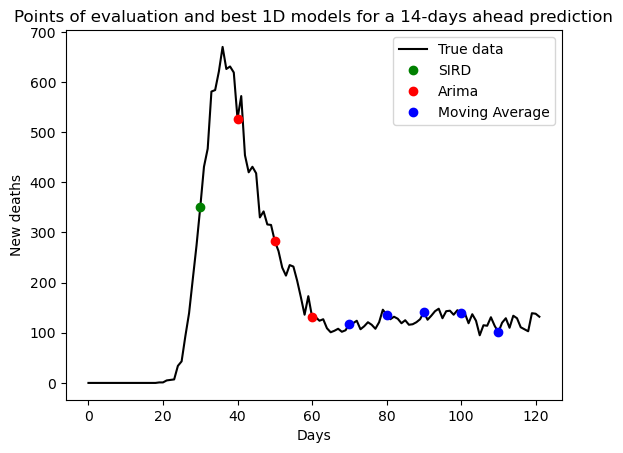

In [35]:
plt.plot(new_deaths, label='True data', c='black')
plt.plot([30], new_deaths[[30]], 'go', label= 'SIRD')

plt.plot([ 40, 50, 60], new_deaths[[ 40, 50, 60]], 'ro', label='Arima')
plt.plot( [70, 80, 90, 100,   110], new_deaths[ [70, 80, 90, 100,  110]], 'bo', label= 'Moving Average')
plt.legend()
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.title('Points of evaluation and best 1D models for a 14-days ahead prediction')

Text(0.5, 1.0, 'Points of evaluation and best 3D models for a 7-days ahead prediction')

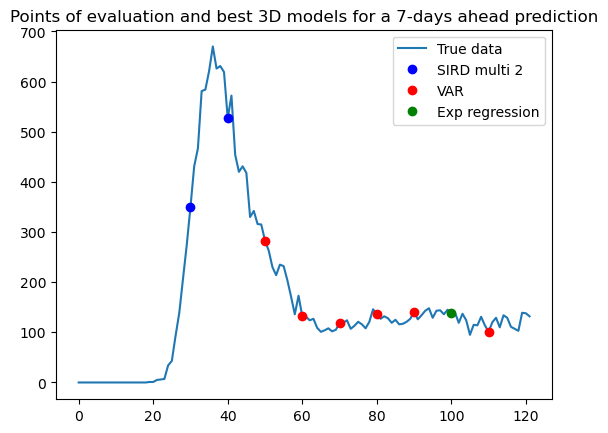

In [36]:
plt.plot(new_deaths, label='True data')
plt.plot([30, 40], new_deaths[[30, 40]], 'bo', label='SIRD multi 2')
plt.plot( [50, 60, 70, 80, 90,  110], new_deaths[ [50, 60, 70, 80, 90,  110]], 'ro', label= 'VAR')
plt.plot([100], new_deaths[[100]],'go',  label= 'Exp regression')
plt.legend()
plt.title('Points of evaluation and best 3D models for a 7-days ahead prediction')

Text(0.5, 1.0, 'Points of evaluation and best models for a 14-days ahead prediction')

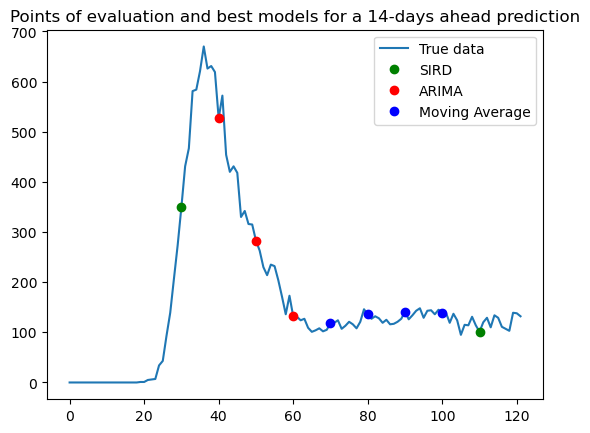

In [37]:
plt.plot(new_deaths, label='True data')
plt.plot([30, 110], new_deaths[[30,110]],'go',   label='SIRD')
plt.plot([ 40, 50, 60], new_deaths[[ 40, 50, 60]], 'ro', label='ARIMA')
plt.plot( [70, 80, 90, 100], new_deaths[ [70, 80, 90, 100]], 'bo', label= 'Moving Average')
plt.legend()
plt.title('Points of evaluation and best models for a 14-days ahead prediction')

In [38]:
# load results: 
import json
import numpy as np
import matplotlib.pyplot as plt
models1D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']

with open('comparing_models_1D_reach=7.json', 'r') as f:
    dicoresults = json.load(f)
best_models_1D_7=[models1D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

with open('comparing_models_1D_reach=14.json', 'r') as f:
    dicoresults = json.load(f)
models1D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']
best_models_1D_14=[models1D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

In [39]:
print(best_models_1D_14)
print(best_models_1D_7)
print(best_models_3D_14)
print(best_models_3D_7)

['Arima', 'MovingAverage', 'Arima', 'SIRD', 'SIRD', 'SIRD', 'Arima', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'SIRD']
['Arima', 'Arima', 'Arima', 'SIRD', 'Arima', 'SIRD', 'SIRD', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage']


NameError: name 'best_models_3D_14' is not defined

In [ ]:
models3D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima']
with open('comparing_models_3D_reach=7.json', 'r') as f:
    dicoresults = json.load(f)
best_models_3D_7=[models3D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

with open('comparing_models_3D_reach=14.json', 'r') as f:
    dicoresults = json.load(f)
best_models_3D_14=[models3D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

In [ ]:
indexs_points=[[30],[35], [40], [45], [50],[55], [60],[65],  [70],[75],  [80],[85], [90],[95], [100],[105] , [110]]


In [ ]:
colours=['bo', 'ro', 'mo', 'go', 'co']

In [ ]:

models=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']

coloursdico=dict()
for i in range(len(models)): 
    coloursdico[models[i]]=colours[i]

aaaaaaaaaaaa
MovingAverage
SIRD
Arima


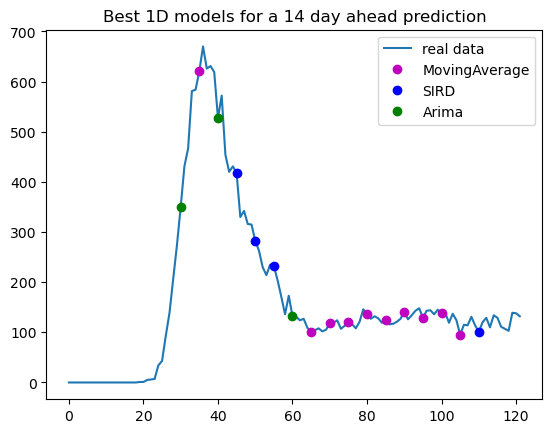

aaaaaaaaaaaa
MovingAverage
SIRD
Arima


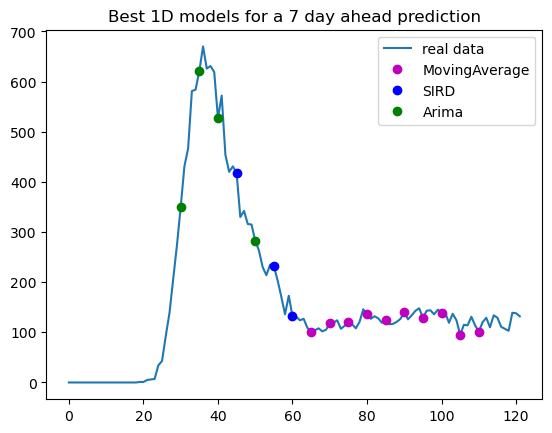

aaaaaaaaaaaa
SIRD
Arima


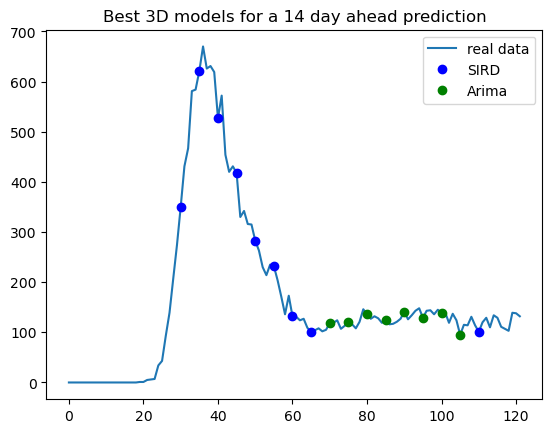

aaaaaaaaaaaa
ExponentialRegression
SIRD
Arima


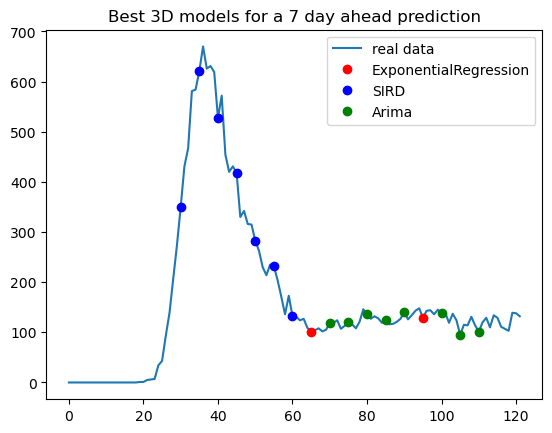

In [ ]:
def plot_best_models(best_models, indexs_points, title):
    plt.plot(new_deaths, label='real data')
    for i in range (len(list(set(best_models)))): 
        model = list(set(best_models))[i]
        print(model)
        colour=coloursdico[model]
        list_of_points=[]
        for j in range(len(best_models)): 
            if best_models[j]==model: 
                list_of_points.append(indexs_points[j])
        plt.plot(list_of_points, new_deaths[list_of_points], colour, label=model)
    plt.legend()
    plt.title(title)
    plt.show()
print('aaaaaaaaaaaa')
plot_best_models(best_models_1D_14, indexs_points, 'Best 1D models for a 14 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_1D_7, indexs_points, 'Best 1D models for a 7 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_3D_14, indexs_points, 'Best 3D models for a 14 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_3D_7, indexs_points, 'Best 3D models for a 7 day ahead prediction')
    